# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [11]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial


$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [145]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(x)
y = np.array(y)


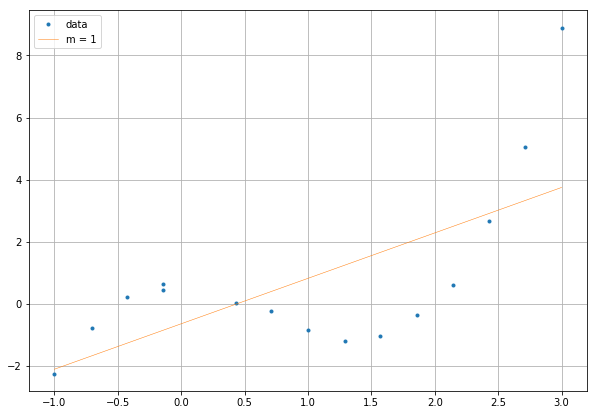

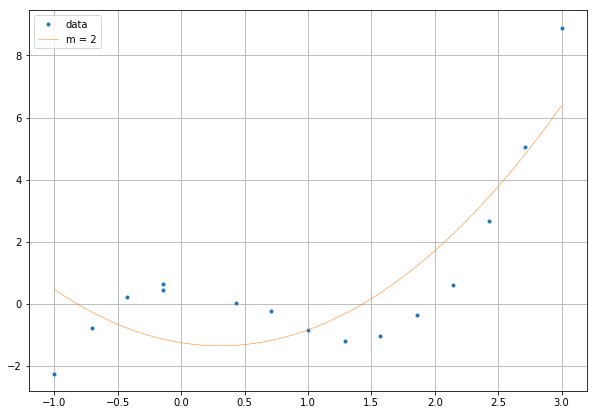

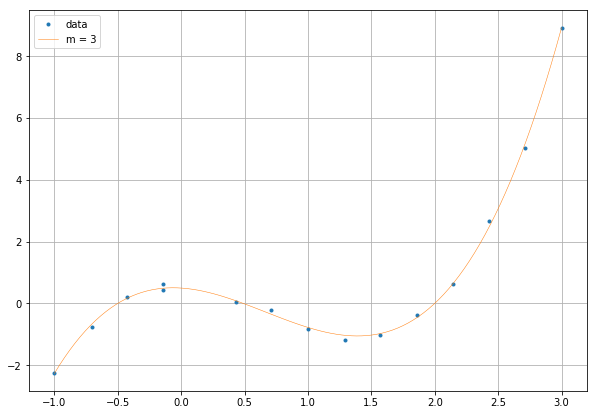

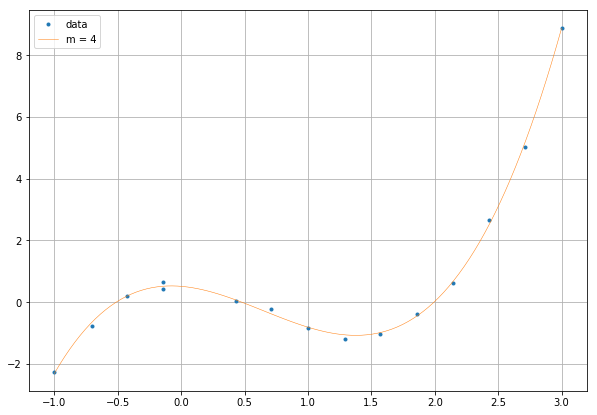

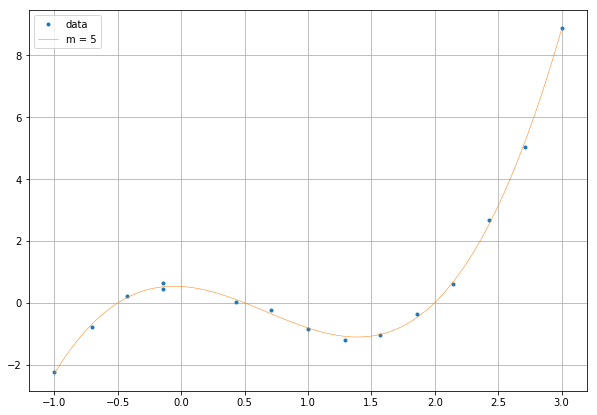

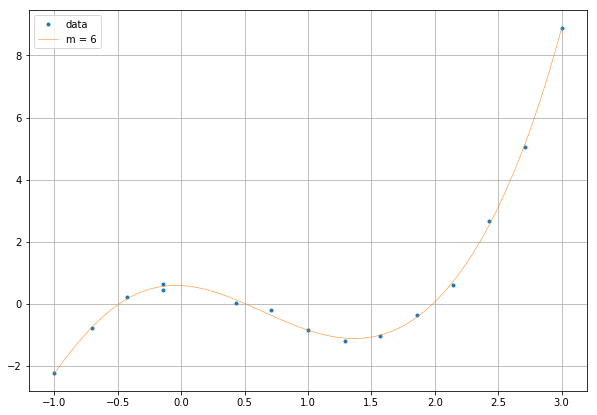

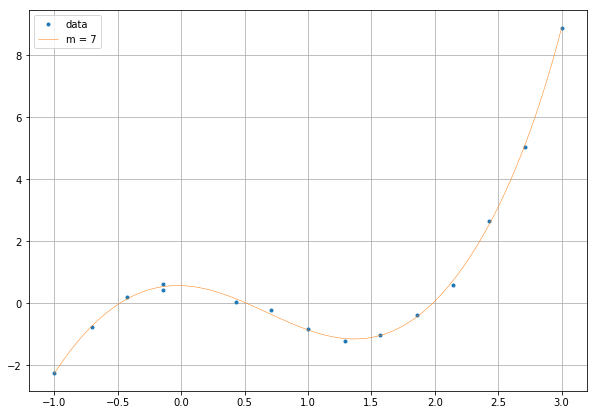

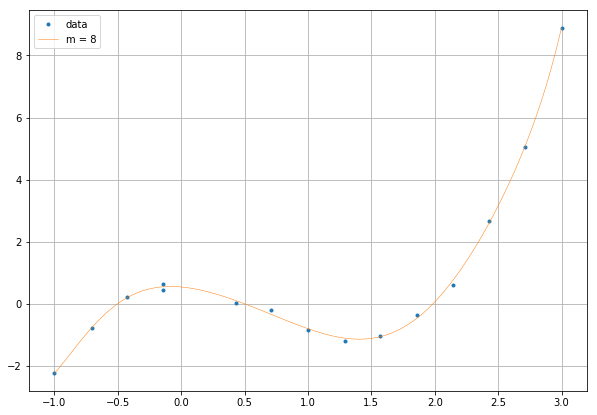

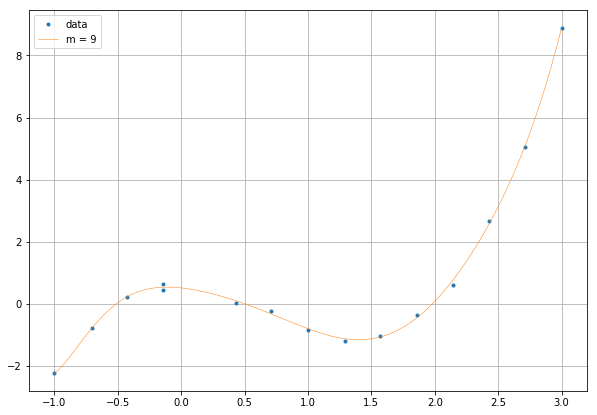

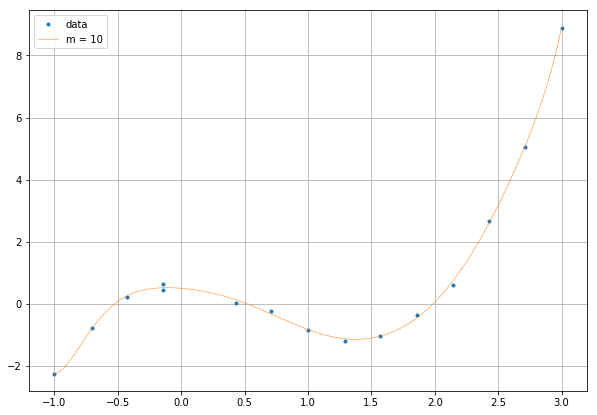

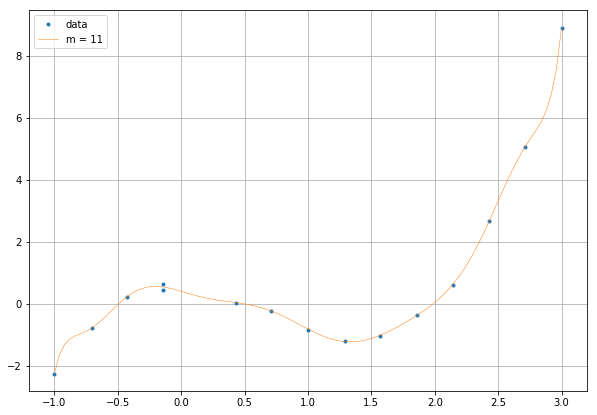

In [262]:
def LSM(x, y, m):
    x_array = np.asarray(x)
    y_array = np.asarray(y)
    X = np.zeros((x_array.shape[0], m + 1))
    for i in range(m + 1):
        X[:, i] = x_array ** i
    return ((np.linalg.inv((X.T @ X)) @ X.T) @ y_array)

def Function(a, x): 
    res = 0
    for i in range(len(a)):
        res += a[i] * x**i
    return res

for m in range(1,12):
    fig, ax = plt.subplots()
    a = least_sqares(x, y, m) 
    x0 = np.linspace(-1, 3, 100)
    ax.plot(x, y, '.', label = 'data')
    ax.plot(x0, [Function(a, i) for i in x0], linewidth  = 0.5, label = "m = {}".format(m))
    ax.grid()
    fig.set_figwidth(10)
    fig.set_figheight(7)
    plt.legend()
    plt.show()

По графикам видно, что оптимальное значение m
от 3 до 7

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

[2.6508335167138153, 2.0380222788099718, 1.5093648372868, 0.1072921207218082, 0.1068739457720368, 0.107026161968722, 0.10213585232691826, 0.10451599242406961, 0.10061411473616022, 0.10527940450710191, 0.10900275504697483, 0.06560152499943603, 0.07713192599572198, 16.866633022420803, 18.723334120517574]


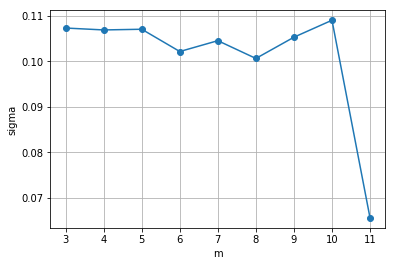

In [263]:
def sigma(x):
    n = len(x)+1
    sigma = []
    for m in range(len(x)):
        sigma_m = 0
        for k in range(len(x)):
            sigma_m += ((np.polyval(LSM(x, y, m)[::-1], x[k]) - y[k])**2)/(n-m)
        sigma.append(np.sqrt(sigma_m))
    return(sigma)
print(sigma(x))
plt.plot([i for i in range(3, 12)], sigma(x)[3:12], 'o-')
plt.xlabel('m')
plt.ylabel('sigma')
plt.grid()

Таким образом, минимальное значение $m=4$


<Figure size 2160x1440 with 0 Axes>

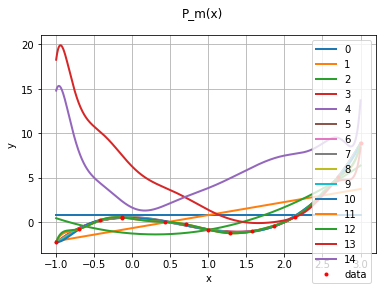

<Figure size 2160x1440 with 0 Axes>

In [265]:
x = np.array(x)
x_p = np.linspace(np.min(x),np.max(x) , 1000)
fig, ax = plt.subplots()

for m in range(len(x)):
    y_p = np.polyval(LSM(x,y,m)[::-1], x_p )
    ax.plot(x_p, y_p, linewidth =2, label=m)
    

ax.plot(x, y, '.', c='red',  label='data')
ax.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.suptitle('P_m(x)')
plt.figure(figsize=(30, 20))

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

[ 0.49483598 -0.26983377 -2.01973166  1.01540301] 0.38684724271575066


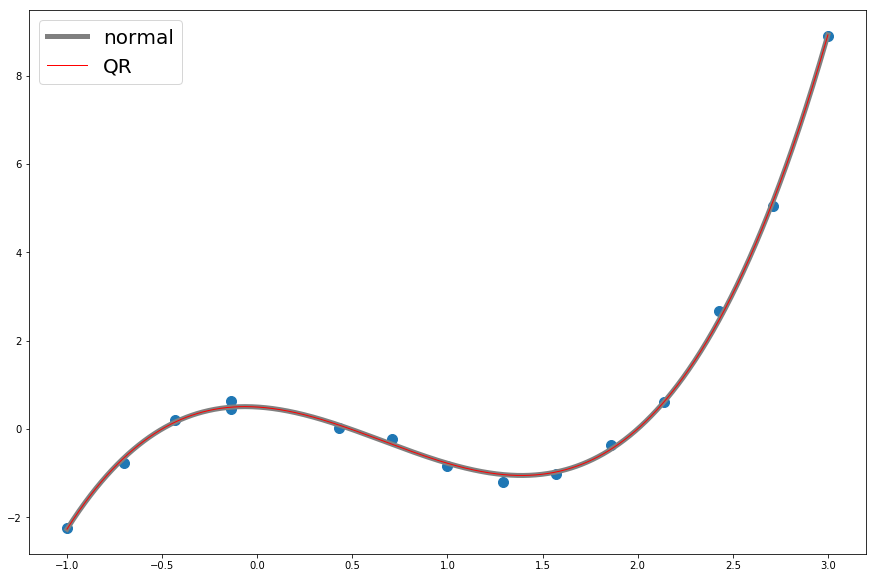

In [273]:
def matrix(x, m):
    x = np.array(x)
    A = np.array([x**i for i in range(m)])
    A = A.T 
    return A

def QR(x, y, m): 
    A = matrix(x, m)
    y = np.array(y)
    q, R = np.linalg.qr(A, 'complete')
    t = q.T@y
    f = t[:m]
    r = t[m:]
    R1 = R[:m, :]
    beta = sp.solve_triangular(R1, f)
    return beta, np.linalg.norm(r)

aa, stress = QR(x, y, 4)
fun = lambda x: np.polyval(np.flip(aa), x)
print(aa, stress)
a2, stress = QR(x, y, 4)
fun2 = lambda x: np.polyval(np.flip(a2), x)
xx = np.linspace(-1, 3, 1000)
fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(x, y, '.', markersize = 20)
ax.plot(xx, fun2(xx), label = 'normal', c = 'grey', lw = 5)
ax.plot(xx, fun(xx), c = 'red', label = 'QR', lw = 1)
ax.legend(fontsize = 20)
plt.show()

почти идеально совпадает


In [277]:
aa, stress = QR(x, y, 15)
fun = lambda x: np.polyval(np.flip(aa), x) 
print(aa, stress)


[-1.17383678e+08 -4.26344284e+08  3.32198337e+09 -2.79245039e+08
 -1.85266550e+10  2.32517150e+10  1.67053717e+10 -5.30901867e+10
  3.18038570e+10  1.28037643e+10 -2.78788562e+10  1.68884050e+10
 -5.25102794e+09  8.51891818e+08 -5.72892951e+07] 0.0


# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

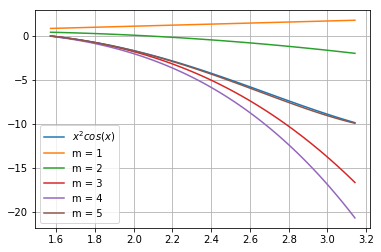

In [296]:
  def xy(a, b, m):
    l = b - a
    x = [l * (i + 1) / (m + 2) for i in range(m + 1)]
    y = [i**2 * np.cos(i) for i in x]
    
    return x, y

def Lagrange (x, y, z):
    n = len(x)
    
    l = np.ones(n)
    s = 0
    
    for i in range(n):
        
        for j in range(n):
            if i == j:
                continue    
            l[i] *= (z - x[j]) / (x[i] - x[j])
            
        s += l[i]*y[i]
    
    return s

a = np.pi / 2
b = np.pi
m = 5

z = np.linspace(np.pi / 2, np.pi, 100)
f = [i**2 * np.cos(i) for i in z]

fig3, ax3 = plt.subplots()
ax3.plot(z, f, label = '$x^{2} cos{(x)}$')

for i in range(1,m+1):
    x, y = xy(a, b, i)
    L = [Lagrange(x, y, j) for j in z]
    ax3.plot(z, L, label = "m = {}".format(i))
    
ax3.legend()
ax3.grid()


### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

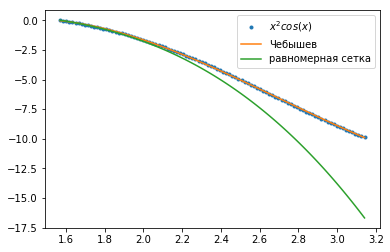

In [304]:
CN = [0.5*(a + b) + 0.5*(b - a)*np.cos((2*k - 1) / (2*4) * np.pi) for k in range(1,5)]

x_cn = CN
y_cn = [i**2 * np.cos(i) for i in x_cn]

x, y = xy(a, b, 3)

L_cn = [Lagrange(x_cn, y_cn, j) for j in z]
L = [Lagrange(x, y, j) for j in z]

fig4, ax4 = plt.subplots()
ax4.plot(z, f,'.',label = '$x^{2} cos{(x)}$')
ax4.plot(z, L_cn, label = 'Чебышев')
ax4.plot(z, L, label = 'равномерная сетка')

ax4.legend()


Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?